# Problem No 1 ~ Calculated by Hand

$$ℎ_𝑓 = 𝑓. \frac {L. U^2} {2𝑔.𝑑}$$
where 𝑓 is a dimensionless loss factor (obtain with Haaland equation or Moody chart, using 

$$\frac ∈ D = 0.001$$

Assuming negligibly small minor losses (entry and exit and elbows) and the pump operates with an efficiency of 86 %, what is the required input power to run the pump?

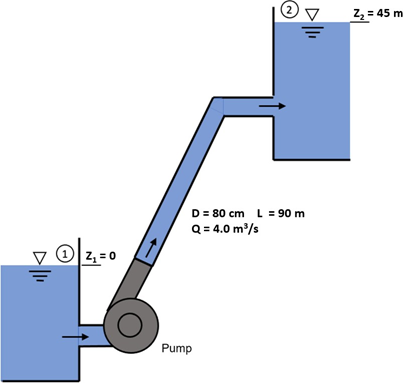

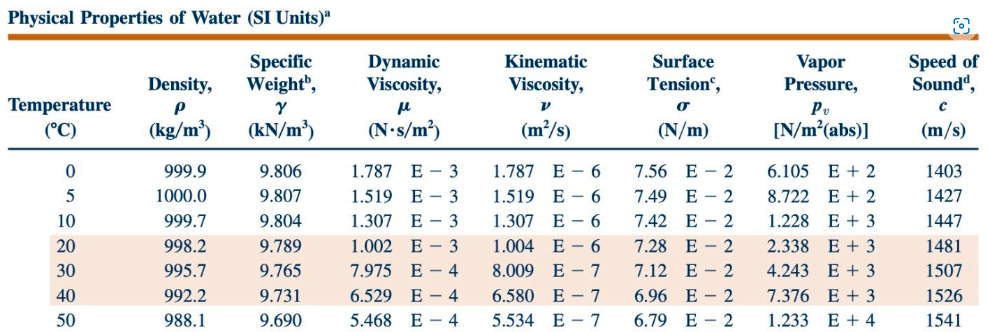

At 20 Temp; the Water density = ρ = 998.2 $\frac {kg} {m^3}$

At 20 Temp; the Water dynamic viscosity = µ = 0.0010020 $\frac {kg} {m.s}$.

Internal Diameter of Pipe = d = 0.8 m

Pipe Length = 90m

Fluid velocity = v ~ Z1 = 0

General Equation for flow rate is given by

$$Q = A * v$$

$$v = \frac Q A$$

$$v = \frac Q {\frac {\pi} 4 d^2}$$

$$v = \frac {4 \frac {m^3} {S}} {\frac {3.14} 4 {0.8}^2}  - - - - (3)$$

$$v = 7.96 m^3$$

$$Re = \frac {ρvd} {\mu} - - - - (4)$$

$$Re = \frac {(998.29 kg/m^3)( 7.96 m^2/s(0.8 𝑚)} {(0.001002 kg/m.s)}$$

$$Re = 6344421.876$$

Note: Change Notation to scientific notation

$$Re = 6.344 x 10^6$$ 

Given that, 

$$\frac ∈ D = 0.001 $$

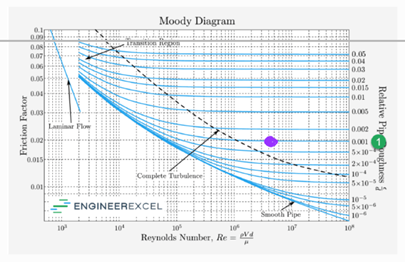

Read Moody Chart
$$𝑓 ≈ 0.019$$

# Problem No 2

Question: If we have a vertical flow of saturated water vapor at 0.15 bar absolute pressure and velocity of 1.0 m/s, what is the largest droplet size than can be carried up by this flow?

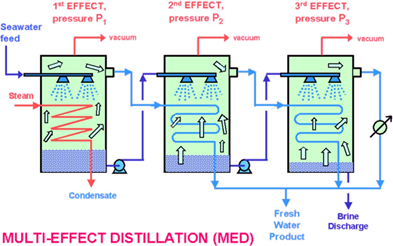
<center>Figure 2</center>

## Solution No 2

Coefficient of drag for rigid sphere is:-

$$C_d = \frac {24} {Re} + 2.6 \frac {Re/5} {1 + {(Re/5})^{1.52}} + 0.411 \frac {{(Re/263000)}^{-7.94}} {1+(Re/263000)^{-8}} + 0.25 \frac {Re x 10^{-6}} {1 + Re x 10^{-6}} - - - - (2a)$$

Given Values;


$g = 9.81$

$𝜌_w = 986.15$

$𝜌_v = 0.099799$

$u = 1$

$𝜇_w = 0.00051198$

$𝜇_v = 1.0650e-5$

$alpha = \frac {4} {3} . \frac {𝜌_w*g} {𝜌_v}$


**what is the largest droplet size than can be carried up by this flow? **

### Fixed Point Method 
g(x) - f(x)-x=o

x=f(x)

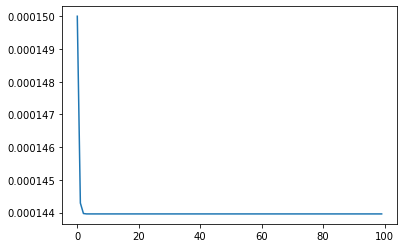

In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
from colored import fore, back, style

# Define Parameters
g = 9.81
rhow = 986.15
rhov = 0.099799
u = 1
muw = 0.00051198
muv = 1.0650e-5
alpha = (4/3)*rhow*g/rhov

def f(dk):
    return Cd(rhov,u,dk,muv)/alpha

# Function to compute C_d of a sphere
def Cd( rho,v,d,mu):
    Re = rho*v*d/mu
    C_d = 24/Re + 2.6*(Re/5)/(1 + (Re/5)**1.52) + 0.411*(Re/263000)**(-7.94)/(1+ (Re/263000)**(-8)) + 0.25*(Re*10**-6)/(1+ Re*10**-6)
    return C_d

nsteps = 100
D = np.empty(nsteps)

D[0] = 0.00015
c = 0.5

for i in range(1,nsteps):
    D[i] = c*f(D[i-1]) + (1-c)*D[i-1]

plt.figure()
plt.plot(range(nsteps),D)

In [88]:
print (back.RED + style.BOLD + "Largest Droplet size" + style.RESET)
D[-1]

Largest Droplet size


0.00014395697657224184

# Problem No 3

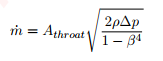

(A) Sketch the venturi and label locations where you define pressures and velocities in the equations.

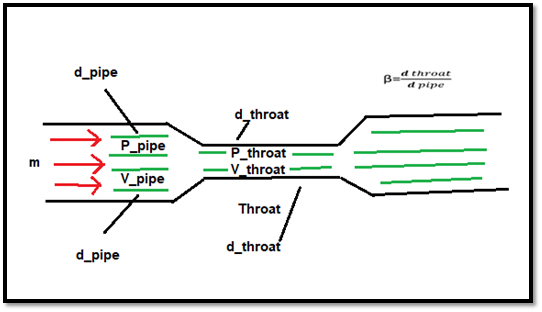

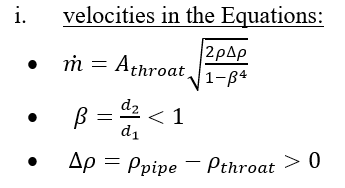

## B - (a) Gauss method

In [3]:
# Import Libaries
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sci

# Gauss Method
# Define Parameters 

rho_mean = 998 #[kg/m3]
A_mean = 0.004 #A throat[m2]
beta_mean = 0.5 #Ratio of d throat/d pipe
m_dot_mean = 20 #[kg/s]
Cd_given = 0.965

rho_std = 0.04*rho_mean
A_std = 0.01*A_mean
beta_std = 0.03*beta_mean
m_dot_std = 0.05*m_dot_mean 

In [4]:
Cd, mdot, rho, A, beta = sym.symbols('Cd mdot rho A beta')

dp = ((mdot/Cd/A)**2)*(1-beta**4)/2/rho

ddp_dmdot = sym.diff(dp,mdot)
ddp_dA = sym.diff(dp,A)
ddp_dbeta = sym.diff(dp,beta)
ddp_drho = sym.diff(dp,rho)


dp_std =((ddp_dmdot*m_dot_std)**2 +
        (ddp_dA*A_std)**2 +
        (ddp_dbeta*beta_std)**2 +
        (ddp_drho*rho_std)**2)**0.5


In [5]:
dp_std.evalf( subs = {
    Cd:Cd_given,
    mdot:m_dot_mean,
    rho:rho_mean,
    A:A_mean,
    beta:beta_mean
})


1384.97452680193

## B - (b) Monte Carlo method

In [6]:
def f(Cd, mdot, rho, A, beta):
    x = ((mdot/Cd/A)**2)*(1-beta**4)/2/rho
    return x[0]

In [7]:
numsample = 50_000
dp_sample = np.empty(numsample)
for i in range(numsample):

        mdot_sample = np.random.normal(loc=m_dot_mean,
                                  scale=m_dot_std,
                                  size=numsample)

        rho_sample = np.random.normal(loc=rho_mean,
                                  scale=rho_std,
                                  size=numsample)

        A_sample = np.random.normal(loc=A_mean,
                                  scale=A_std,
                                  size=numsample)

        beta_sample = np.random.normal(loc=beta_mean,
                                  scale=beta_std,
                                  size=numsample)

        dp_sample[i] = f(Cd_given, mdot_sample, rho_sample, A_sample, beta_sample)

In [8]:
dp_sample.std()

1384.737802731775

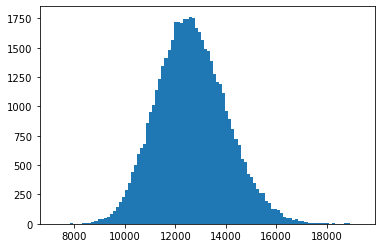

In [9]:
plt.hist(dp_sample, bins=100)
plt.show()

## Problem No 4

In [10]:
print (back.RED + style.BOLD + "Define Constants for Problem 4" + style.RESET)

rho = 1025
mu = 0.00109
mdot = 750
d = 0.6
eps = 4.5*1e-3
g = 9.81
L = 400
eta = 0.82

q=mdot/rho
A=np.pi*(d**2)/4
v= q/A
Re=rho*v*d/mu

f = (-1.8*np.log10((eps/d/3.7)**(1.11)+(6.9/Re)))**(-2)
h = f*(L/d)*((v**2)/(2*g))

Define Constants for Problem 4


Part A

In [11]:
print (back.RED + style.BOLD + "Electricity cost per year for this single pipeline" + style.RESET)
P=h*rho*g*q/eta/1000
hourly_cost=0.15
cost=P*hourly_cost*24*365
cost
print (back.RED + style.BOLD + "eletricity cost per year = $"+str(int(round(cost)))+ style.RESET)

Electricity cost per year for this single pipeline
eletricity cost per year = $92786


In [12]:
import numpy as np
rho = 1025
mu = 0.00109
mdot = 750
d = 0.6
eps = 4.5*1e-3
g = 9.81
L = 400
eta = 0.82

def calc(eps,d):
    q = mdot / rho
    v = q / (np.pi*d**2/4)
    Re = rho*v*d/mu
    f = (-1.8*np.log10((eps/d/3.7)**(1.11)+(6.9/Re)))**(-2)
    h = f*L*(v**2)/d/2/g
    P= rho*g*q*h/eta / 1000
    return P

Pnl = calc(eps,d)
Pwl = calc(0.2e-3,d-10e-3)

Pnl, Pwl

(70.61353939958342, 35.007400773619416)

In [13]:
I = 300*400
a = 8760*0.10/2
b = 2.5*8760
Cf = (I-a*(Pnl-Pwl))/(b*(Pnl-Pwl))
Cf
print (back.RED + style.BOLD + "Estimate how high the raised electricity price = $"+str(Cf)+ style.RESET)

Estimate how high the raised electricity price = $0.1338906566745461


## Problem No 5

NOTE: The WNTR simulation library in python will be used for comparison in
 
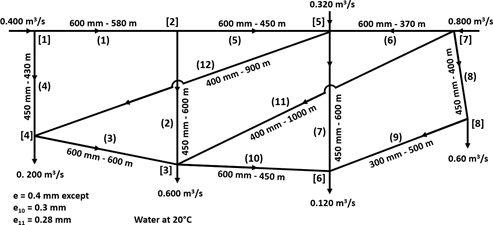
Figure 3: Pipe network to analyze. Figure adapted and modifed from Jeppson (1974), and the
values have been changed.


a) Use whichever method you are most comfortable with (Linearized approach from lectures, Hardy-Cross, Newton-Rhapson, or other) to setup equations and then solve the ﬂow rates and pressures throughout the network. Start from conservation of mass and consider only the major losses for ∆p calculations(i.e. neglect minor losses due to ﬁttings and instruments).

In [14]:
print (back.RED + style.BOLD + "Solution of Problem 5 Started Here"+ style.RESET)

from utils import *
import matplotlib.pyplot as plt
import numpy.linalg as lin
import numpy as np
import pandas as pd
import dill
from statistics import variance

pipes, loopsind, params, Qsd, numnodes, numpipes = load_networkB()
numloops = loopsind.shape[1]

Solution of Problem 5 Started Here


In [15]:
pipes

,id,start,end,D,eps,L,k,Q0
0,1.0,0.0,1.0,0.600,0.00040,580.0,616.301147,0.20
1,2.0,1.0,2.0,0.450,0.00040,600.0,2686.642717,0.20
2,3.0,3.0,2.0,0.600,0.00040,600.0,637.552910,0.20
3,4.0,0.0,3.0,0.450,0.00040,430.0,1925.427281,0.20
4,5.0,1.0,4.0,0.600,0.00040,450.0,478.164683,0.00
5,6.0,6.0,4.0,0.600,0.00040,370.0,393.157628,0.00
6,7.0,4.0,5.0,0.450,0.00040,600.0,2686.642717,0.12
7,8.0,6.0,7.0,0.450,0.00040,400.0,1791.095145,0.60
8,9.0,7.0,5.0,0.399,0.00040,500.0,4085.326396,0.00
9,10.0,2.0,5.0,0.600,0.00030,450.0,478.164683,0.00


In [16]:
loopsind

array([[ 1.,  0.,  0.,  1.,  0.],
       [ 1., -1.,  0.,  0., -1.],
       [-1.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  1.,  1.],
       [ 0.,  0., -1.,  0., -1.],
       [ 0.,  1., -1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [17]:
params

{'rho': 1000, 'g': 9.81, 'nu': 1.004e-06, 'eta': 0.85}

In [18]:
Qsd

{0: 0.4, 1: 0.0, 2: -0.6, 3: -0.2, 4: 0.32, 5: -0.12, 6: 0.8, 7: -0.6}

In [19]:
numpipes

12

In [20]:
numnodes

8

## Problem 5 (Part A)

a)	Use whichever method you are most comfortable with (Linearized approach from lectures, Hardy- Cross, Newton-Rhapson, or other) to setup equations and then solve the flow rates  and  pres- sures throughout  the  network.  Start from conservation of mass and consider only the major losses for ∆p calculations (i.e. neglect minor losses due to fittings and instruments).

In [21]:
Acons= np.zeros((numnodes-1, numpipes))
bcons= np.zeros(numnodes-1)
Acons.shape

(7, 12)

Conservation Equation

In [22]:
Acons = np.zeros((numnodes-1, numpipes))
bcons = np.zeros(numnodes-1)

for i in range(numnodes-1):
    Acons[i,pipes['start']==i] = -1
    Acons[i,pipes['end']==i] = 1
    bcons[i] = -Qsd[i]

Fixed Point Iteration

In [23]:
bloop = np.zeros(numloops)
b = np.hstack((bcons,bloop))

Qguess = np.ones(numpipes)

iter_max = 20

storeQ = np.empty((numpipes,iter_max))
storeQ[:,0] = Qguess

error = np.empty((numpipes,iter_max))

for ii in range(iter_max):
    
    f = fhalland(Qguess, pipes, params)
    fQK = f * abs(Qguess) * pipes['k']
    Aloop = loopsind.T @ np.diag(fQK)
    
    A = np.vstack((Acons,Aloop))
    
    z = lin.solve(A,b)
    
    c = 0.5
    
    Qnew = c*z + (1-c)*Qguess
    
    error[:,ii] = abs(Qnew-Qguess)
    storeQ[:,ii] = Qnew
    
    Qguess = Qnew

Qguess

array([ 0.11995114,  0.25284248,  0.22127304,  0.28005038, -0.13289038,
        0.21343356,  0.25931945,  0.42701794, -0.17298148,  0.03366478,
        0.1595506 ,  0.14122342])

In [24]:
pipes['Q_fp'] = Qguess
pipes['Hl_fp'] = head_loss(Qguess, pipes, params)
pipes

,id,start,end,D,eps,L,k,Q0,Q_fp,Hl_fp
0,1.0,0.0,1.0,0.600,0.00040,580.0,616.301147,0.20,0.119951,0.169934
1,2.0,1.0,2.0,0.450,0.00040,600.0,2686.642717,0.20,0.252842,3.353687
2,3.0,3.0,2.0,0.600,0.00040,600.0,637.552910,0.20,0.221273,0.580796
3,4.0,0.0,3.0,0.450,0.00040,430.0,1925.427281,0.20,0.280050,2.942825
4,5.0,1.0,4.0,0.600,0.00040,450.0,478.164683,0.00,-0.132890,0.160859
5,6.0,6.0,4.0,0.600,0.00040,370.0,393.157628,0.00,0.213434,0.333683
6,7.0,4.0,5.0,0.450,0.00040,600.0,2686.642717,0.12,0.259319,3.525944
7,8.0,6.0,7.0,0.450,0.00040,400.0,1791.095145,0.60,0.427018,6.324393
8,9.0,7.0,5.0,0.399,0.00040,500.0,4085.326396,0.00,-0.172981,2.464765
9,10.0,2.0,5.0,0.600,0.00030,450.0,478.164683,0.00,0.033665,0.011398


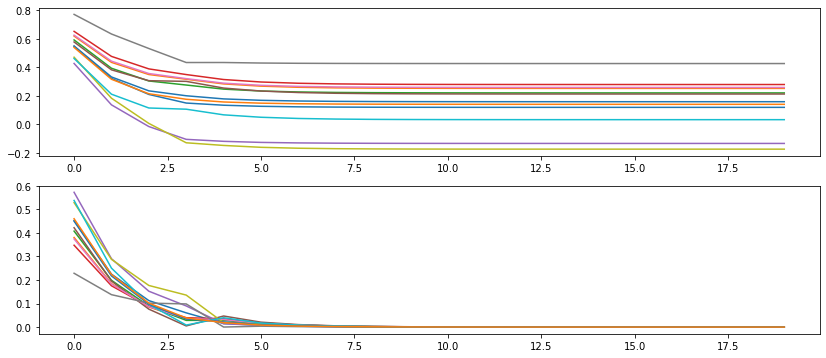

In [25]:
plt.figure(figsize=(14,6))
plt.subplot(211)
plt.plot(range(iter_max),storeQ.T)
plt.subplot(212)
plt.plot(range(iter_max),error.T)
plt.show()

## Problem 5 (Part B)

b) Assuming node [1] is at 100 kPa (gauge) and that water to supply nodes ([1], [5] and [7]) was delivered from open reservoirs at 0 kPa (gauge) by pumps that are 85% eﬃcient.

How much energy (in kWh) per day is required to deliver the water (report for each pump)?

In [26]:
P = calculate_pressures(pipes['Q_fp'], pipes['Hl_fp'], params, numnodes)
P[1], P[4], P[6]

(10.02374562617477, 10.184604299014739, 10.518287731904739)

In [27]:
calculate_pump(P, Qsd, params, printit=True)

Node 1: 1129.4117647058827 KWh
Node 5: 902.7249830249525 KWh
Node 7: 2330.753565740849 KWh


4362.890313471684

In [28]:
with open('part_ab.pickle', 'wb') as file:
    dill.dump({'pipes':pipes,
               'loopsind':loopsind,
              'params':params,
              'Qsd':Qsd,
              'numnodes':numnodes,
              'numpipes':numpipes}, file)

### Capstone C, D, E, and F

In [42]:
import wntr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import dill
from statistics import variance

In [43]:
with open('part_ab.pickle', 'rb') as handle:
    data = dill.load(handle)
pipes = data['pipes']
loopsind = data['loopsind']
params = data['params']
Qsd = data['Qsd']
numnodes = data['numnodes']
numpipes = data['numpipes']

In [48]:
eta = params['eta'] 
supply_nodes = ['R1','J5','J7'] 
rho = params['rho'] 
g = params['g'] 
inp_file = 'Spring 2022 Capstone.inp'

In [45]:
tablecols=['J2','J3','J4','J5','J6','J7','J8','R1']

In [46]:
def convergence_plots(All_Pressure, Pump_Power):
    
    I = All_Pressure.shape[0]
    
    meanPressure = np.zeros(I)
    for i in range(I):
        meanPressure[i] = np.mean(All_Pressure[:i,:])
        
    P = pd.DataFrame(Pump_Power).to_numpy()
    
    meanPower = np.zeros(I)
    for i in range(I):
        meanPower[i] = np.mean(P[:i,:])
        
        
    plt.figure(figsize=(14,6))
    plt.subplot(211)
    plt.plot(range(I),meanPressure,linewidth=2)
    plt.grid()

## Problem 5 (Part C)

c)	Use WNTR to check solution of part a. Report your results for flow rates and pressures throughout the network.
Hint: WNTR requires at least one reservoir, so even though we know all of the flowrates into the network, you will need to set one as a reservoir. WNTR will solve for the flow from the reservoir into the network and you can check to confirm that it matches the given value and mass is con- served. Also, make sure that all of your junctions and pipes have unique names.
Check point: To check your result, the flowrate in pipe 2 should be approximately 0.24 m3/s and the head at node 3 should be approximately 7 m.


Problem (5) Part C


,flowrate,headloss
0,0.130575,0.350309
1,0.239586,5.058315
2,0.202957,0.826206
3,0.269425,6.377779
4,-0.109011,0.247137
5,0.166492,0.561515
6,0.243949,5.241736
7,0.485508,20.478453
8,-0.114492,9.677157
9,-0.009457,0.002576


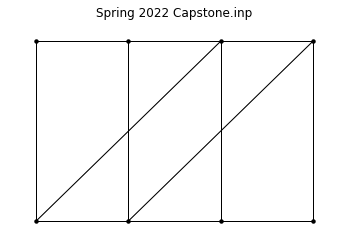

In [47]:
print (back.RED + style.BOLD + "Problem (5) Part C"+ style.RESET)
import wntr
from statistics import variance

eta = params['eta']
supply_nodes = ['R1','J5','J7']
rho = params['rho']
g = params['g']
inp_file = 'Spring 2022 Capstone.inp'


wn = wntr.network.WaterNetworkModel(inp_file)


# Graph the network
wntr.graphics.plot_network(wn, title=wn.name)


#Simulate hydraulics
results0 = wntr.sim.EpanetSimulator(wn).run_sim()


#Output results of interest

head = results0.node['head']

flowrate = results0.link['flowrate']

demand = results0.node['demand']

headloss = results0.link['headloss']

linktable = pd.DataFrame({'flowrate': flowrate.values[0,:], 'headloss':headloss.values[0,:]})
nodetable = pd.DataFrame({'head':head.values[0,:], 'demand' :demand.values[0,:]})
linktable

In [37]:
flowrate

name,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
0,0.130575,0.239586,0.202957,0.269425,-0.109011,0.166492,0.243949,0.485508,-0.114492,-0.009457,0.148,0.133532


In [38]:
head 

name,J2,J3,J4,J5,J6,J7,J8,R1
0,10.006821,6.971831,7.467555,10.118032,6.972991,10.325793,2.134412,10.21


In [39]:
pipes

,id,start,end,D,eps,L,k,Q0,Q_fp,Hl_fp
0,1.0,0.0,1.0,0.600,0.00040,580.0,616.301147,0.20,0.119951,0.169934
1,2.0,1.0,2.0,0.450,0.00040,600.0,2686.642717,0.20,0.252842,3.353687
2,3.0,3.0,2.0,0.600,0.00040,600.0,637.552910,0.20,0.221273,0.580796
3,4.0,0.0,3.0,0.450,0.00040,430.0,1925.427281,0.20,0.280050,2.942825
4,5.0,1.0,4.0,0.600,0.00040,450.0,478.164683,0.00,-0.132890,0.160859
5,6.0,6.0,4.0,0.600,0.00040,370.0,393.157628,0.00,0.213434,0.333683
6,7.0,4.0,5.0,0.450,0.00040,600.0,2686.642717,0.12,0.259319,3.525944
7,8.0,6.0,7.0,0.450,0.00040,400.0,1791.095145,0.60,0.427018,6.324393
8,9.0,7.0,5.0,0.399,0.00040,500.0,4085.326396,0.00,-0.172981,2.464765
9,10.0,2.0,5.0,0.600,0.00030,450.0,478.164683,0.00,0.033665,0.011398


## Problem 5 (Part D)

d) d)	Use WNTR and estimate the effect of uncertainty in pipe conditions of pumping power needed to supply network shown in figure 3. Use your code and Monte-Carlo method for propagating uncertainty and consider: 

- i) uncertainty in pipe roughness, 
- ii) uncertainty in pipe length, 
- iii) uncertainty in pipe diameter (see table 1). 

Perform a convergence study to show that you have run enough iterations for your results to have converged. To estimate uncertainty in roughness, use a normal distribution with the mean matching the nominal roughness and the standard deviation of  1/5  the  mean.

Repor the uncertainties in pressure throughout the system based on your MC simulation as well as the uncertainty in required pumping power at the supply node 5.

In [40]:
print (back.RED + style.BOLD + "Problem (5) Part D"+ style.RESET)
from statistics import variance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wntr
import scipy.stats as sci

pascal= head * rho * g

Problem (5) Part D


In [50]:
def runMC(wn, derr, lerr, do_eps, I):
        
    Pressure = np.empty((I,numnodes))
    Pump_Power = np.empty((I,len(supply_nodes)))

    d_mean = wn.query_link_attribute('diameter').to_numpy() #[m]
    l_mean = wn.query_link_attribute('length').to_numpy() #[m]
    eps_mean = wn.query_link_attribute('roughness').to_numpy() #[mm]

    for i in range(I):
    
        # Get d,l,eps from distribution        
        # Update wn model with new values
        count = 0
        for pipe_name,pipe in wn.pipes(): # Iterate over pipes, count used to mark index of mean values
            pipe.diameter = np.random.uniform((1-derr)*d_mean[count],(1+derr)*d_mean[count])
            pipe.length = np.random.uniform((1-lerr)*l_mean[count],(1+lerr)*l_mean[count])
            if do_eps:
                pipe.roughness = np.random.normal(loc=eps_mean[count], scale=0.2*eps_mean[count])
            count = count+1 #index of pipe   

        # Simulate hydraulics
        results = wntr.sim.EpanetSimulator(wn).run_sim()

        # Process Results - store in pressure, power arrays
        head = results.node['head'] #[m]
        Pressure[i,:] = pd.Series.to_numpy(head.loc[0,:]) # write head directly to storage array
            
    demand = results.node['demand'] #[m^3/s]
    demand_list = pd.Series.to_numpy(demand.loc[0,:])
    Pump_Power = dict()
    for supply_node in supply_nodes:
        node_index = tablecols.index(supply_node)
        P = Pressure[:,node_index]
        d = demand_list[node_index]
        Pump_Power[supply_node] = P*rho*g*abs(d)/eta
    
    return Pressure, Pump_Power

In [51]:
wn = wntr.network.WaterNetworkModel(inp_file)
I=200
Pressure, Pump_Power = runMC(wn,0.02,0.01,True,I)

In [52]:
Pressure

array([[ 9.978,  7.031,  7.453, 10.069,  7.032, 10.275,  2.391, 10.21 ],
       [10.006,  7.078,  7.533, 10.077,  7.083, 10.279,  2.457, 10.21 ],
       [10.025,  7.076,  7.649, 10.136,  7.079, 10.343,  2.367, 10.21 ],
       [10.027,  7.021,  7.548, 10.151,  7.023, 10.349,  1.876, 10.21 ],
       [10.014,  6.931,  7.462, 10.121,  6.933, 10.299,  3.087, 10.21 ],
       [10.049,  6.943,  7.443, 10.189,  6.943, 10.396,  2.518, 10.21 ],
       [10.027,  6.858,  7.362, 10.136,  6.858, 10.33 ,  2.16 , 10.21 ],
       [10.007,  6.971,  7.46 , 10.132,  6.971, 10.362,  2.129, 10.21 ],
       [ 9.983,  6.695,  7.149, 10.082,  6.698, 10.295,  2.244, 10.21 ],
       [10.052,  6.991,  7.523, 10.187,  6.992, 10.431,  2.106, 10.21 ],
       [ 9.997,  6.999,  7.528, 10.12 ,  6.999, 10.354,  1.861, 10.21 ],
       [10.014,  6.901,  7.422, 10.108,  6.905, 10.318,  2.421, 10.21 ],
       [10.035,  7.197,  7.701, 10.169,  7.197, 10.355,  2.263, 10.21 ],
       [10.003,  7.024,  7.484, 10.139,  7.026, 10.

In [53]:
Pump_Power['R1']

array([47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166,
       47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166,
       47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166,
       47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 47134.166, 4713

In [54]:
Pump_Power['J5']

array([37188.253, 37216.44 , 37434.2  , 37487.782, 37380.256, 37628.077, 37435.63 , 37419.855, 37233.617, 37621.547, 37375.945, 37329.795, 37555.124, 37446.718, 37348.395, 37205.194, 37078.758, 37232.776, 37436.659, 37588.732, 37442.294, 37315.351, 37117.198, 37185.062, 37583.998, 37173.823,
       37498.665, 37202.57 , 37374.709, 37410.331, 37201.922, 37459.531, 37320.042, 37391.685, 37369.831, 37401.019, 37253.697, 37199.531, 37244.751, 37608.727, 37267.306, 37325.403, 37297.966, 37379.161, 37422.93 , 37444.721, 37276.594, 37203.651, 37415.382, 37610.009, 37214.429, 37348.698,
       37423.655, 37433.299, 37436.13 , 37517.776, 37479.202, 37309.205, 37413.145, 37434.605, 37319.563, 37200.105, 37241.767, 37346.902, 37642.43 , 37358.123, 37305.905, 37410.585, 37128.148, 37402.1  , 37101.243, 37414.709, 37392.154, 37305.507, 37483.946, 37442.079, 37620.554, 37206.501,
       37211.826, 37175.528, 37134.654, 37284.948, 37235.382, 37311.301, 37427.029, 37521.714, 37508.323, 37370.419, 3736

In [56]:
def convergence_plots(All_Pressure, Pump_Power):
    
    I = All_Pressure.shape[0]
    
    meanPressure = np.zeros(I)
    for i in range(I):
        meanPressure[i] = np.mean(All_Pressure[:i,:])
    
    P = pd.DataFrame(Pump_Power).to_numpy()
    
    meanPower = np.zeros(I)
    for i in range(I):
        meanPower[i] = np.mean(P[:i,:])


    plt.figure(figsize=(14,6))
    plt.subplot(211)
    plt.plot(range(I),meanPressure,linewidth=2)
    plt.grid()
    plt.subplot(212)
    plt.plot(range(I),meanPower,linewidth=2)
    plt.grid()

C:\Users\mohamed.aljaziri\Miniconda3\envs\dewa\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mohamed.aljaziri\Miniconda3\envs\dewa\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


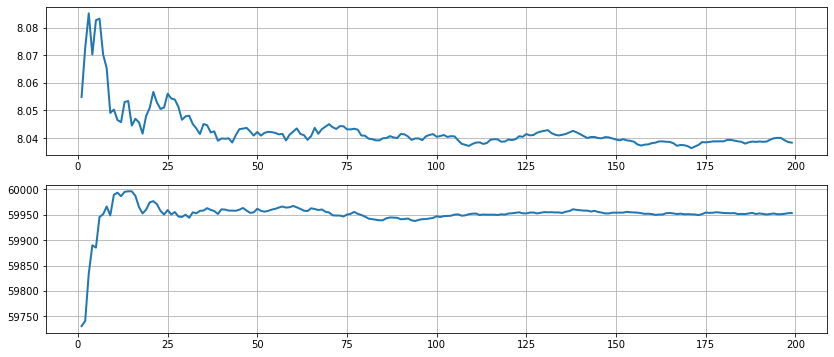

In [57]:
convergence_plots(Pressure, Pump_Power)

C:\Users\mohamed.aljaziri\Miniconda3\envs\dewa\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mohamed.aljaziri\Miniconda3\envs\dewa\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


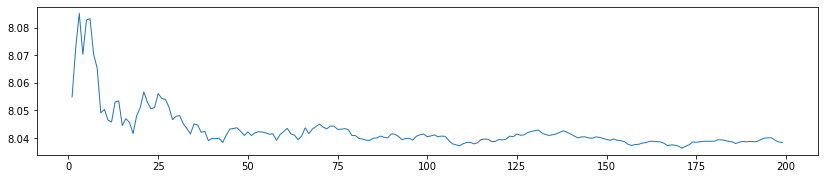

In [58]:
plt.figure(figsize=(14,6))
plt.subplot(211)
plt.plot(range(I), [np.mean(Pressure[:i,]) for i in range(I)], linewidth=1)
plt.show()

In [59]:
def plot_hist(All_Pressure, Pump_Power):
    
    for i in range(numnodes-1):
        
        plt.figure()
        plt.hist(All_Pressure[:,i], bins=100, density = True, label='MC')
        plt.title(f'Pressure at Node {i+2} MC Mean = {np.mean(All_Pressure[:,i])}, std={np.std(All_Pressure[:,i])}')
        plt.xlabel('Pressure[m]')
        plt.ylabel('PDF')
    P=pd.DataFrame(Pump_Power).to_numpy()
    
    for i in range(2):
        plt.figure()
        plt.hist(P[:,i+1]/1000, bins=100, density = True, label='MC')
        plt.title(f'Pump power at Node {supply_nodes[i]} MC Mean = {np.mean(P[:,i+1]/1000)}, std={np.std(P[:,i+1])}')
        plt.xlabel('Power[m]')
        plt.ylabel('PDF')

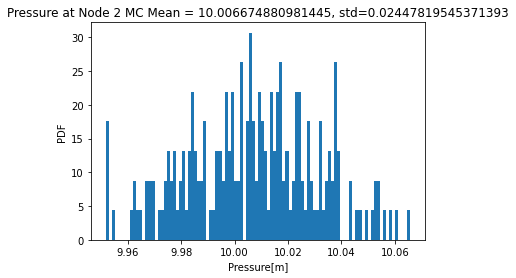

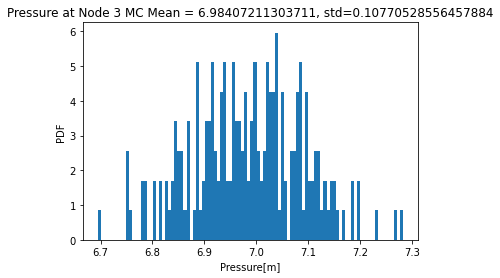

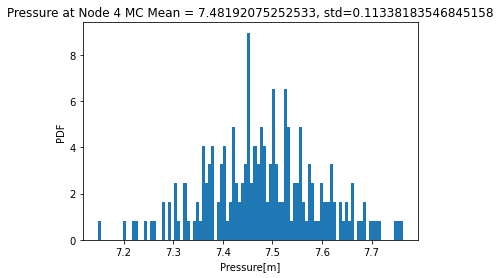

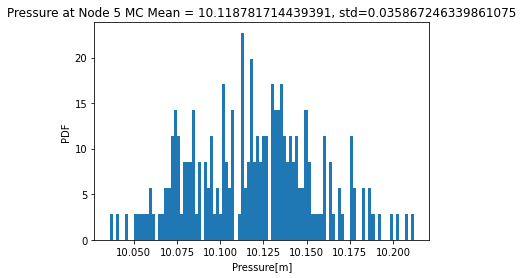

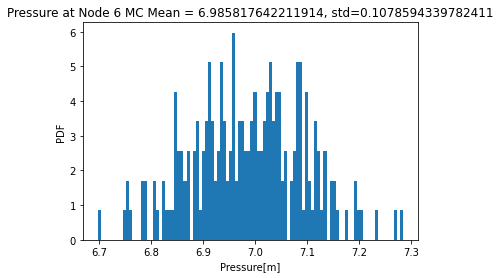

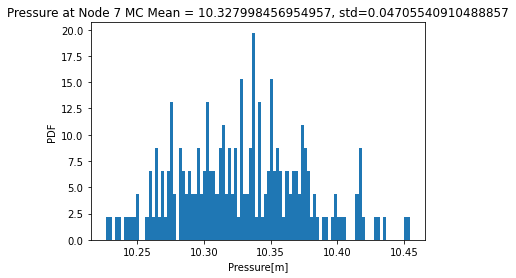

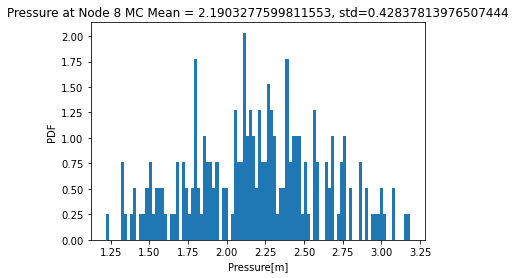

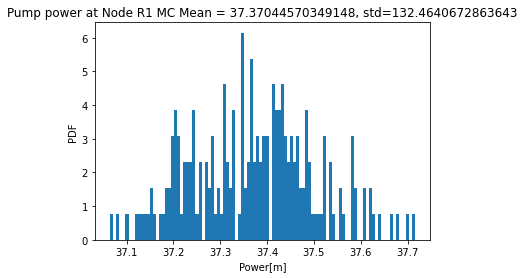

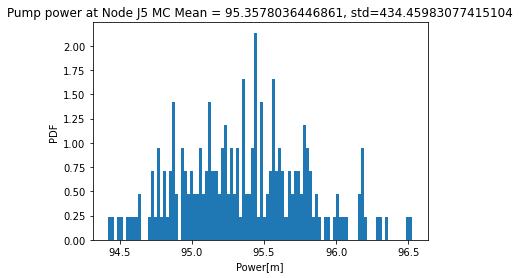

In [60]:
plot_hist(Pressure, Pump_Power)

## Problem 5 (Part E)

e) Consider what happens if water temperature ranges from 5◦C to 30◦C. Modify your ﬂuid prop-erties in the input ﬁle for each of these two limiting cases, then rerun your MC simulation. Report the uncertainties in pressure throughout the system based on your MC simulation as well as the uncertainty in required pumping power at the supply node 5 at the diﬀerent temperatures. Compare these to your results from part d) and discuss what eﬀect does temperature have on your results?

In [62]:
# Data Frame 
df_pressure_var = pd.DataFrame()
df_power_var = pd.DataFrame()

In [63]:
def compute_variance(All_Pressure, Pump_Power): 
    var_pressure = [variance(All_Pressure[:,i]) for i in range (numnodes)]
    P = pd.DataFrame(Pump_Power).to_numpy()
    var_power = [variance(P[:,i]) for i in range (len(supply_nodes))]
    return var_pressure, var_power

MC with wntr, Temp: 5 C

In [64]:
rho = 999.93 # [kg/m^3] 
wn.options.hydraulic.specific_gravity= 1.002
wn.options.hydraulic.viscosity= 1.5207

All_Pressure, Pump_Power = runMC(wn, 0.02, 0.01, True, 200)

var_pressure, var_power = compute_variance(All_Pressure, Pump_Power)

df_pressure_var['T5'] = var_pressure
df_power_var['T5'] = var_power

C:\Users\mohamed.aljaziri\Miniconda3\envs\dewa\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mohamed.aljaziri\Miniconda3\envs\dewa\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


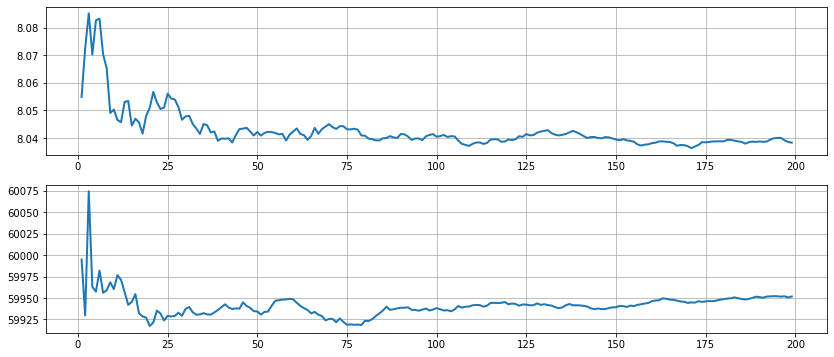

In [65]:
convergence_plots(Pressure, Pump_Power) 

MC with wntr, Temp: 30 C

In [68]:
rho = 995.65 # [kg/m^3] 
wn.options.hydraulic.specific_gravity= 0.996052
wn.options.hydraulic.viscosity= 0.7972


All_Pressure, Pump_Power = runMC(wn, 0.02, 0.01, True, 200)

var_pressure, var_power = compute_variance(All_Pressure, Pump_Power)

df_pressure_var['T30'] = var_pressure
df_power_var['T30'] = var_power

C:\Users\mohamed.aljaziri\Miniconda3\envs\dewa\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mohamed.aljaziri\Miniconda3\envs\dewa\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


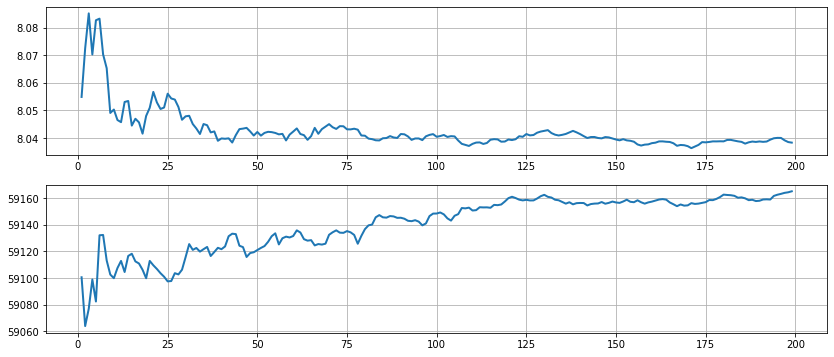

In [69]:
convergence_plots(Pressure, Pump_Power)

In [70]:
df_pressure_var
df_power_var

,T5,T30
0,0.000000,0.000000
1,15092.835528,18848.320084
2,167335.144123,174488.758428


## Problem 5 (Part F)

f) Investigate the importance of considering each of the three sources of uncertainty. To check this, re-run simulation while setting one uncertainty at a time to be zero and see what eﬀect that has. Report results from each case and brieﬂy discuss your observations on how they change from your results in part d) and from case to case (i.e. which uncertainty has the most signiﬁcant eﬀect?).

MC with wntr removing Diameter Uncertainty

In [72]:
wn = wntr.network.WaterNetworkModel(inp_file)
All_Pressure, Pump_Power = runMC(wn, 0.0, 0.01, True, 200)
var_pressure, var_power = compute_variance(All_Pressure, Pump_Power)

df_pressure_var['No diam'] = var_pressure
df_power_var['No diam'] = var_power

MC with wntr removing Length Uncertainty

In [73]:
wn = wntr.network.WaterNetworkModel(inp_file)
All_Pressure, Pump_Power = runMC(wn, 0.02, 0.0, True, 200)
var_pressure, var_power = compute_variance(All_Pressure, Pump_Power)

df_pressure_var['No length'] = var_pressure
df_power_var['No length'] = var_power

MC with wntr removing Roughness Uncertainty

In [75]:
wn = wntr.network.WaterNetworkModel(inp_file)
All_Pressure, Pump_Power = runMC(wn, 0.02, 0.01, False, 200)
var_pressure, var_power = compute_variance(All_Pressure, Pump_Power)

df_pressure_var['No rough'] = var_pressure
df_power_var['No rough'] = var_power

In [76]:
df_pressure_var
df_power_var

,T5,T30,No diam,No length,No rough
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,15092.835528,18848.320084,5285.911663,20029.992804,8213.712488
2,167335.144123,174488.758428,58823.779806,211619.735667,94792.673753


## Problem 5 (Part G)

g) Within each pipe, calculate viscous length scale (SSA will provide example upon request), wall shear stress and estimate if a super hydrophobic coating with damage threshold of 10 Pa of shear and manufactural with rams roughness of 100 µm might result in drag reduction in each pipe segment (Requires having roughness below ∼ 5 viscous length scales. For simplicity: assume that there would be a way to avoid entrainment of gas from the surface into the ﬂow and a way to supply gas to the surface at pipeline pressure – not necessarily achievable presently).

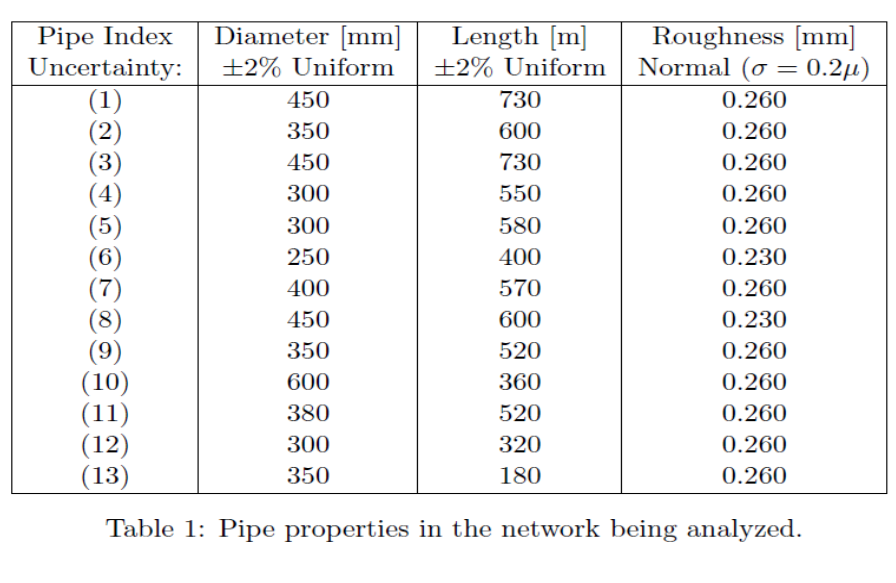

In [77]:
from utils import *
import dill

# solve part a again
with open('part_ab.pickle', 'rb') as handle:
    data = dill.load(handle)
pipes = data['pipes']
loopsind = data['loopsind']
params = data['params']
Qsd = data['Qsd']
numnodes = data['numnodes']
numpipes = data['numpipes']
numloops = loopsind.shape[1]

In [78]:
eps_min = 100e-6
shear_max = 10

# Calculate the sheer stress and viscous length scale
pipes['tau'] = pipes['Hl_fp'] * pipes['D'] / pipes['L'] / 4  # in meters of water
pipes['tau'] = pipes['tau'] * 9806.38  # in Pascals

pipes['lv'] = params['nu'] * np.sqrt(params['rho'] / pipes['tau'])  # in meters

print('These can use the coating.')
print(5 * pipes['lv'] > eps_min) and (pipes['tau'] < shear_max)

These can use the coating.
0      True
1     False
2      True
3     False
4      True
5      True
6     False
7     False
8     False
9      True
10    False
11    False
Name: lv, dtype: bool
